In [1]:
### Check ECF vs Pfam coverage of proteins

In [163]:
import pandas as pd
import seaborn as sns
sns.set(rc={"figure.figsize":(10, 8)})

In [16]:
### params and data source
scan_pfam_path      = '/Users/kszczepaniak/Data/Phage/preliminary-results/hhblits-pfam.txt'
ecf_aho_80_filepath = '/Users/kszczepaniak/Data/Phage/preliminary-results/table-ecf-aho-80'
n_reprseqs          = 34464 # number of all reprseqs

In [4]:
# load Pfam scan data (all reprseqs on Pfam HHsuite scan)
df_pfam = pd.read_csv(scan_pfam_path)
df_pfam

,qname,qstart,qend,qlength,sstart,send,slength,pident,bitscore,eval,prob,pval,annot
0,reprseq00010,90,209,209,22,149,255,14,73.6,7.300000e-07,96.9,1.500000e-10,PF13497.6 ; DUF4121 ; Domain of unknown functi...
1,reprseq00025,20,78,288,9,70,71,25,81.9,5.500000e-11,98.3,1.300000e-14,PF03118.15 ; RNA_pol_A_CTD ; Bacterial RNA pol...
2,reprseq00025,204,277,288,19,82,97,20,76.2,7.300000e-09,97.7,1.700000e-12,PF04447.12 ; DUF550 ; Protein of unknown funct...
3,reprseq00025,210,278,288,3,71,81,25,60.7,5.900000e-07,96.9,1.400000e-10,PF12643.7 ; MazG-like ; MazG-like family
4,reprseq00025,205,275,288,5,74,76,20,43.7,1.100000e-03,93.3,2.600000e-07,PF03819.17 ; MazG ; MazG nucleotide pyrophosph...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154046,reprseq34461,2,124,174,2,158,182,9,66.8,2.300000e-07,97.1,5.500000e-11,PF11041.8 ; DUF2612 ; Protein of unknown funct...
154047,reprseq34462,3,157,925,7,150,150,21,90.0,3.800000e-08,97.5,8.300000e-12,PF12571.8 ; DUF3751 ; Phage tail-collar fibre ...
154048,reprseq34462,712,735,925,70,93,93,33,82.7,5.800000e-08,97.4,1.200000e-11,PF14928.6 ; S_tail_recep_bd ; Short tail fibre...
154049,reprseq34462,589,642,925,2,57,57,19,66.6,6.300000e-07,96.9,1.400000e-10,PF07484.12 ; Collar ; Phage Tail Collar Domain


In [97]:
len(df_pfam['qname'].unique())

11865

In [5]:
# load ECF table (with desired AHO cutoff)
table_ecf_80 = pd.read_pickle(ecf_aho_80_filepath + '.pickle')
table_ecf_80

,prot_id,ecf_id,nb_hits,avg_hits_overlap,ecf_span,avg_hit_len_to_ecf_span,span_to_qlength,cluster_data
0,reprseq00051,0,8,0.892866,211,0.883294,0.370175,qname qstart qend qlength ...
1,reprseq00051,1,10,0.972710,187,0.939572,0.328070,qname qstart qend qlength ...
5,reprseq00178,0,13,0.861788,588,0.911303,0.399457,qname qstart qend qlength ...
6,reprseq00178,1,7,0.932685,155,0.875576,0.105299,qname qstart qend qlength ...
7,reprseq00178,2,27,0.857170,291,0.741377,0.197690,qname qstart qend qlength ...
...,...,...,...,...,...,...,...,...
9191,reprseq34436,4,12,0.913263,28,0.872024,0.354430,qname qstart qend qlength ...
9192,reprseq34445,0,33,0.874346,78,0.861305,0.478528,qname qstart qend qlength ...
9193,reprseq34445,1,9,0.974533,62,0.953405,0.380368,qname qstart qend qlength ...
9194,reprseq34447,0,5,0.841576,63,0.869841,0.473684,qname qstart qend qlength ...


In [15]:
# add to ECF table columns: ECF_start and ECF_end (according to ECF span and cluster_data)
ecf_start = []
ecf_end   = []

for seqid, ecf in table_ecf_80.iterrows():
    ecf_start.append(ecf.cluster_data['qstart'].min())
    ecf_end.append(ecf.cluster_data['qend'].max())

table_ecf_80['ecf_start'] = ecf_start
table_ecf_80['ecf_end'] = ecf_end
table_ecf_80

,prot_id,ecf_id,nb_hits,avg_hits_overlap,ecf_span,avg_hit_len_to_ecf_span,span_to_qlength,cluster_data,ecf_start,ecf_end
0,reprseq00051,0,8,0.892866,211,0.883294,0.370175,qname qstart qend qlength ...,200,410
1,reprseq00051,1,10,0.972710,187,0.939572,0.328070,qname qstart qend qlength ...,3,189
5,reprseq00178,0,13,0.861788,588,0.911303,0.399457,qname qstart qend qlength ...,609,1196
6,reprseq00178,1,7,0.932685,155,0.875576,0.105299,qname qstart qend qlength ...,1,155
7,reprseq00178,2,27,0.857170,291,0.741377,0.197690,qname qstart qend qlength ...,555,845
...,...,...,...,...,...,...,...,...,...,...
9191,reprseq34436,4,12,0.913263,28,0.872024,0.354430,qname qstart qend qlength ...,15,42
9192,reprseq34445,0,33,0.874346,78,0.861305,0.478528,qname qstart qend qlength ...,1,78
9193,reprseq34445,1,9,0.974533,62,0.953405,0.380368,qname qstart qend qlength ...,102,163
9194,reprseq34447,0,5,0.841576,63,0.869841,0.473684,qname qstart qend qlength ...,1,63


In [132]:
def get_ecf_regions(ecf_df):
    
    ecfs = []
    
    if not ecf_df.empty:
#         display(ecf_df)    
        for eid, ecf in ecf_df.iterrows():
            ecfs.append([ecf.ecf_start, ecf.ecf_end])
    
    return ecfs

def get_pfam_regions(pfam_df):
    
    pfams = []
    
    if not pfam_df.empty:
#         display(pfam_df)    
        for pid, pfam in pfam_df.iterrows():
            pfams.append([pfam.qstart, pfam.qend])
            
    return pfams

def get_regions_overlap(ecf_regions, pfam_regions, reprid):
    
    overlaps = []
    
    for ecfr in ecf_regions:
        ecfpos = set([ x for x in range(ecfr[0], ecfr[1]+1)])
        for pfamr in pfam_regions:
            pfampos = set([ x for x in range(pfamr[0], pfamr[1]+1)])
            overlap = len(ecfpos.intersection(pfampos)) / len(ecfpos.union(pfampos))
            overlaps.append([reprid, ecfr[0], ecfr[1], pfamr[0], pfamr[1], overlap])
    
    return overlaps

def get_ECF_Pfam_covered_regions(ecf_regions, pfam_regions, reprid, reprlen):
    
    if (not ecf_regions or not pfam_regions):
        return []

    # set of all ECF positions in reprseq
    ecfpos = [ [ x for x in range(ecfr[0], ecfr[1]+1)] for ecfr in ecf_regions ]
    ecfpos = set([ pos for region in ecfpos for pos in region ])
    
    # set of all Pfam positions in reprseq
    pfampos = [ [ x for x in range(pfamr[0], pfamr[1]+1)] for pfamr in pfam_regions ]
    pfampos = set([ pos for region in pfampos for pos in region ])
    
    ecf_pfam_intersect = ecfpos.intersection(pfampos)
    # percent of ECF covered by Pfam
    ecf_pfam_perc = len(ecf_pfam_intersect) / len(ecfpos)
    # percent of Pfam covered by ECF
    pfam_ecf_perc = len(ecf_pfam_intersect) / len(pfampos)
    # percent of query annotated by ECF and Pfam
    ecf_pfam_union = ecfpos.union(pfampos)
    query_annot    = len(ecf_pfam_union) / reprlen
     
    return [reprid, ecf_pfam_perc, pfam_ecf_perc, query_annot, reprlen]

In [156]:
# for each reprseq:
# get all regions (start, stop) with ECF
# get all regions (start, stop) with Pfam
# create list of lits of regions and their overlaps

overlap_regions = []
covered_regions = []

for reprseq in range(1, n_reprseqs+1):
    if reprseq in range(1,35000, 1000):
        print(reprseq)
    reprid       = 'reprseq{:0>{id_width}}'.format(reprseq, id_width=len(str(n_reprseqs)))
    if not df_pfam[df_pfam['qname'] == reprid].empty:
        reprlen      = df_pfam[df_pfam['qname'] == reprid]['qlength'].to_list()[0]
    else:
        reprlen = -1
    ecf_regions  = get_ecf_regions(table_ecf_80[table_ecf_80['prot_id'] == reprid])
    pfam_regions = get_pfam_regions(df_pfam[df_pfam['qname'] == reprid])
    covered_regions.append(get_ECF_Pfam_covered_regions(ecf_regions, pfam_regions, reprid, reprlen))
#     overlap_regions += get_regions_overlap(ecf_regions, pfam_regions, reprid)

1
1001
2001
3001
4001
5001
6001
7001
8001
9001
10001
11001
12001
13001
14001
15001
16001
17001
18001
19001
20001
21001
22001
23001
24001
25001
26001
27001
28001
29001
30001
31001
32001
33001
34001


In [157]:
# create df: prot_id, ecf_start-stop, pfam_start-stop, overlap
covers_dict = {k:v for k,v in enumerate(covered_regions) if v }
covers_df    = pd.DataFrame().from_dict(covers_dict, orient='index', 
                         columns=['prot_id', 'ecf_pfam_perc', 'pfam_ecf_perc', 'query_perc', 'qlen'])

In [158]:
### covers

In [159]:
covers_df

,prot_id,ecf_pfam_perc,pfam_ecf_perc,query_perc,qlen
24,reprseq00025,0.844961,0.612360,0.687500,288
26,reprseq00027,1.000000,0.555556,0.878049,82
30,reprseq00031,1.000000,0.972973,0.462500,80
34,reprseq00035,1.000000,0.518519,0.461538,117
38,reprseq00039,1.000000,0.508475,0.883895,267
...,...,...,...,...,...
34414,reprseq34415,1.000000,0.657343,0.567460,252
34434,reprseq34435,0.956522,0.383721,0.916230,191
34435,reprseq34436,0.954545,0.608696,0.898734,79
34444,reprseq34445,0.514286,1.000000,0.858896,163


[Text(0.5, 0, 'Percent of ECF covered by Pfam')]

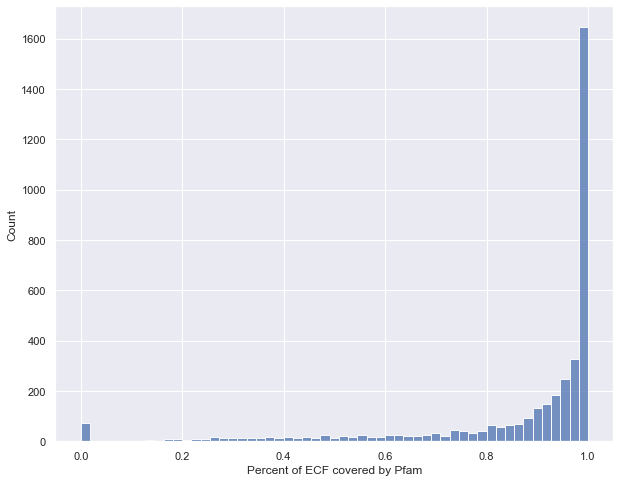

In [166]:
sns.histplot(covers_df['ecf_pfam_perc']).set(xlabel='Percent of ECF covered by Pfam')

[Text(0.5, 0, 'Percent of Pfam covered by ECF')]

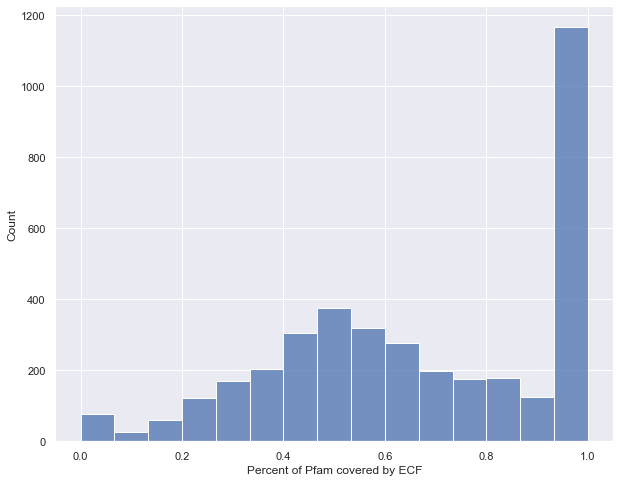

In [167]:
sns.histplot(covers_df['pfam_ecf_perc']).set(xlabel='Percent of Pfam covered by ECF')

[Text(0.5, 0, 'Percent of reprseq covered by ECF or Pfam')]

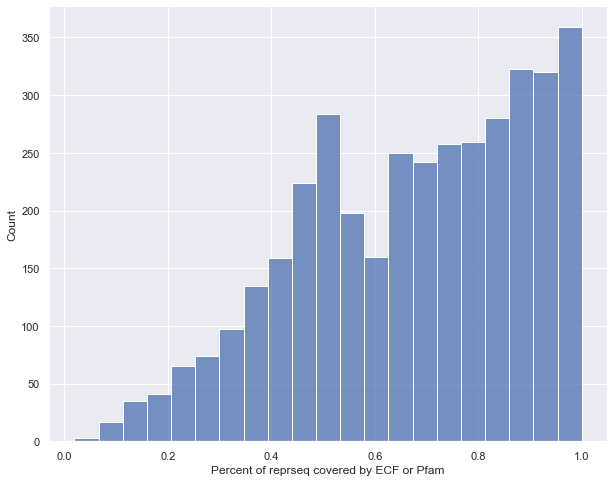

In [168]:
sns.histplot(covers_df['query_perc']).set(xlabel='Percent of reprseq covered by ECF or Pfam')

[Text(0.5, 0, 'Distribution of query lengths')]

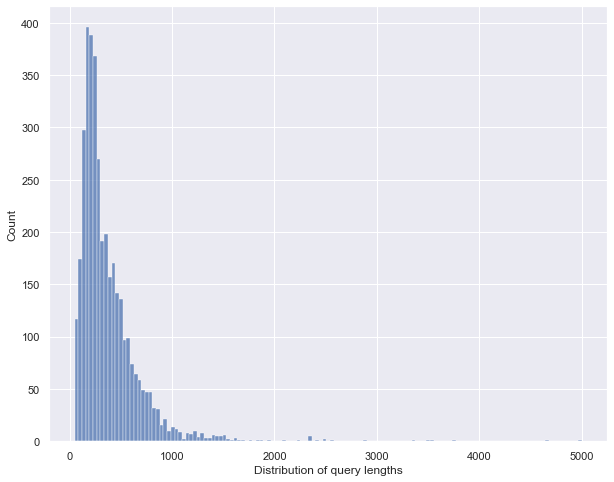

In [169]:
sns.histplot(covers_df['qlen']).set(xlabel='Distribution of query lengths')

In [ ]:
### overlaps

In [ ]:
# create df: prot_id, ecf_start-stop, pfam_start-stop, overlap
overlaps_dict = {k:v for k,v in enumerate(overlap_regions)}
overlap_df    = pd.DataFrame().from_dict(overlaps_dict, orient='index', 
                         columns=['prot_id', 'ecf_start', 'ecf_end', 'pfam_start', 'pfam_end', 'overlap'])

In [95]:
overlap_threshold = 0.95 # (intersection / union of positions)
len(overlap_df[overlap_df['overlap'] >= overlap_threshold].groupby('prot_id'))

1448

In [96]:
overlap_df

,prot_id,ecf_start,ecf_end,pfam_start,pfam_end,overlap
0,reprseq00025,163,288,20,78,0.000000
1,reprseq00025,163,288,204,277,0.587302
2,reprseq00025,163,288,210,278,0.547619
3,reprseq00025,163,288,205,275,0.563492
4,reprseq00025,163,288,170,262,0.738095
...,...,...,...,...,...,...
213746,reprseq34447,88,132,92,129,0.844444
213747,reprseq34447,88,132,101,131,0.688889
213748,reprseq34447,88,132,91,131,0.911111
213749,reprseq34447,88,132,90,132,0.955556


In [ ]:
overlap_df.to_csv('/Users/kszczepaniak/Data/Phage/preliminary-results/ECF-Pfam-overlaps.csv')